# ANOVA Analysis

**Scenario**: we are in charge of the development of a new fertilizer in a Chemical Company. The team was studing the effect of different types of fertilizers on a specific plant growth. We randomly assign 4 different types of fertilizers to 50 plants and record the height of the plants after 1 month.

**Null hypothesis**: H0=  Groups means are equal (there is no variation in means of groups, μ1=μ2=…=μp) <br>
**Alternative hypothesis**: H1= At least, one group mean is different from other groups


In [54]:
from scipy.stats import f_oneway
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import kruskal
from matplotlib.cbook import boxplot_stats


In [56]:
df= pd.read_excel('fertilizers.xlsx')

In [57]:
df.head()

,FertilizerType,Plant1,Plant2,Plant3,Plant4
0,Type A,3,9,17,6
1,Type A,9,6,57,1
2,Type A,7,7,3,9
3,Type A,10,4,69,5
4,Type A,2,3,7,4


In [7]:
df.describe()

,Plant1,Plant2,Plant3,Plant4
count,149.000000,149.000000,149.000000,149.000000
mean,10.060403,48.000000,51.456376,45.912752
std,8.165706,33.008189,29.694044,35.429018
min,0.000000,0.000000,0.000000,0.000000
25%,5.000000,10.000000,24.000000,9.000000
50%,9.000000,55.000000,50.000000,47.000000
75%,15.000000,77.000000,78.000000,77.000000
max,50.000000,106.000000,99.000000,109.000000


We use the f_oneway function to perform the ANOVA analysis:


In [8]:
f_statistic, p_value = f_oneway(df['Plant1'], df['Plant2'], df['Plant3'], df['Plant4'])


In [9]:
print('F-statistic:', f_statistic)
print('P-value:', p_value)


F-statistic: 67.64851489338628
P-value: 1.2637165536860095e-37


- A large **F-statistic** indicates that the variance between groups is greater than the variance within groups, which suggests that the means of the groups are different. <br>
 F = variance between groups / variance within groups.
-  If the **p-value** is less than the level of significance (alpha), then reject the null hypothesis and conclude that there is a significant difference between the means of the groups.

Text(0, 0.5, 'Plant Height (cm)')

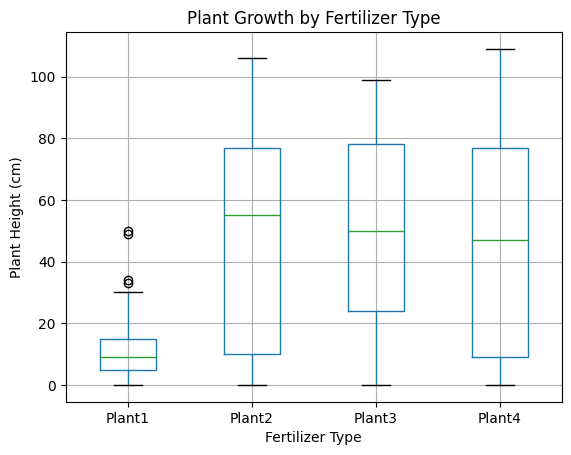

In [10]:
df.boxplot(column=['Plant1', 'Plant2','Plant3', 'Plant4'])
plt.title('Plant Growth by Fertilizer Type')
plt.xlabel('Fertilizer Type')
plt.ylabel('Plant Height (cm)')


###  Step 3: Residual Analysis

The observed_values variable is a 1D array containing all the observed values in the dataset. The predicted_values variable is a 1D array containing the mean of each row repeated 4 times (since there are 4 plants per row) to match the shape of observed_values. The residuals variable is a 1D array containing the difference between the observed values and the predicted values.

In [ ]:
observed_values = df[['Plant1', 'Plant2', 'Plant3', 'Plant4']].values.flatten()
predicted_values = df.mean(axis=1).repeat(4).values
residuals = observed_values - predicted_values

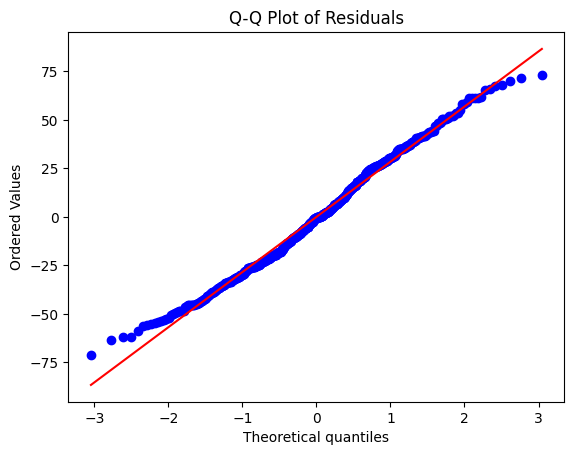

In [12]:
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


From the graph, we can say that the residuals are distributed quite normally. <br>

**NON-normally distributed Residuals:** a lack of normality in the residuals can lead to inaccurate estimates of the standard error, confidence intervals, and p-values.
If you find that your data is non normal distributes you can consider using a different statistical method, such as the nonparametric methods (Kruskal-Wallis test). Another option is to transform your data using some mathematical normalization methods or, you may use more robust methods, such as  regression or the trimmed mean, can be used to estimate the parameters of the model and can be more resistant to the effects of outliers or non-normality. However, these methods may require more advanced statistical knowledge to implement.


Now, we are going to check if there is any outliers or irregularity in the data by performing scatter plots.

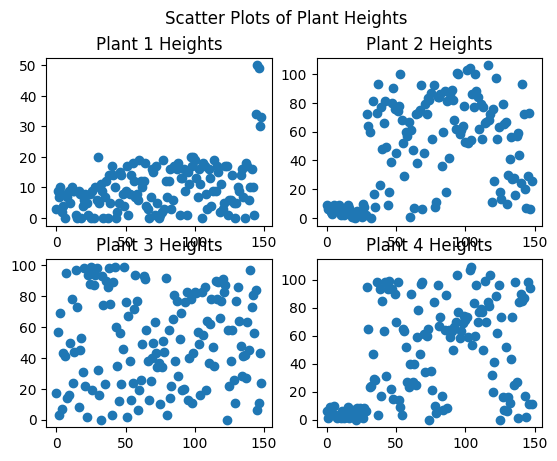

In [80]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.suptitle('Scatter Plots of Plant Heights')

axes[0, 0].scatter(range(len(df)), df['Plant1'])
axes[0, 0].set_title('Plant 1 Heights')

axes[0, 1].scatter(range(len(df)), df['Plant2'])
axes[0, 1].set_title('Plant 2 Heights')

axes[1, 0].scatter(range(len(df)), df['Plant3'])
axes[1, 0].set_title('Plant 3 Heights')

axes[1, 1].scatter(range(len(df)), df['Plant4'])
axes[1, 1].set_title('Plant 4 Heights')

plt.show()


In the first scatterplot (Plant 1 Height), it is shown that there are some outliers in the data. <br>
 <br>
OUTLIERS case: They have a significant impact on the results of your ANOVA analysis. This is because ANOVA assumes that the data is normally distributed and that there are no extreme values that could skew the results.
 <br>
If you find outliers in your data, you can consider removing them from your analysis. However, before doing so, you should carefully evaluate whether the outliers are valid data points or if they were caused by errors or measurement issues.  <br>

***As it occurs with non-normal distributed data points, if the outliers are valid data points, you may want to consider using a different statistical method that is less sensitive to outliers, such as the nonparametric Kruskal-Wallis test.***

###  Step 4: Validate ANOVA results

The F statistic and p-value turn out to be equal to 67.65 and 1.26e-37, respectively. 
But since ANOVA assumption were violated by the presence of outliers and we have decided that all measurements are needed, we have decide to move to Kruskal-Wallis test.


# Kruskal-Wallis test  <br>
The Kruskal-Wallis test is a nonparametric alternative to ANOVA for testing whether there are significant differences between two or more independent groups. It assumes that the data for each group is independent and identically distributed. It also assumes that the groups have the same shape and scale, but not necessarily the same location. If these assumptions are violated, the Kruskal-Wallis test may not be appropriate.
 <br>
 

In [65]:
# Melt the DataFrame to long format
df_long = pd.melt(df, id_vars='FertilizerType', var_name='Plant', value_name='Yield')

# Perform the Kruskal-Wallis test
test_statistic, p_value = stats.kruskal(*[df_long['Yield'][df_long['FertilizerType']==t] for t in df_long['FertilizerType'].unique()])

# Print the results
print("Kruskal-Wallis test statistic:", test_statistic)
print("p-value:", p_value)


Kruskal-Wallis test statistic: 107.1080681881082
p-value: 3.01026951189497e-22


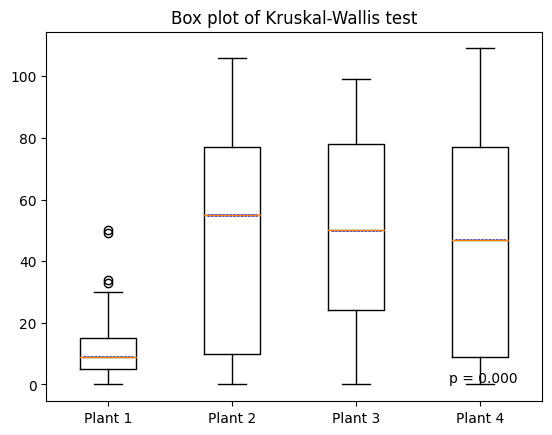

In [67]:
# Create a box plot of the data
data= (df['Plant1'], df['Plant2'], df['Plant3'], df['Plant4'])
fig, ax = plt.subplots()
ax.boxplot(data)


# Add the p-value to the plot
plt.text(0.95, 0.05, f'p = {p_value:.3f}', transform=ax.transAxes, ha='right')

# Add confidence intervals for the medians
medians = [np.median(x) for x in data]
conf_ints = stats.median_abs_deviation(data) / np.sqrt(len(data[0]))
for i, median in enumerate(medians):
    ax.plot([i+1-0.2, i+1+0.2], [median, median], color='green', linewidth=1, label='Median')
    ax.plot([i+1-0.2, i+1+0.2], [median - conf_ints[i], median - conf_ints[i]], color='blue', linewidth=0.5, linestyle='--', label='Confidence Interval')
    ax.plot([i+1-0.2, i+1+0.2], [median + conf_ints[i], median + conf_ints[i]], color='blue', linewidth=0.5, linestyle='--')

# Set the x-axis labels and title
ax.set_xticklabels(['Plant 1', 'Plant 2', 'Plant 3', 'Plant 4'])
ax.set_title('Box plot of Kruskal-Wallis test')

# Add a legend
#ax.legend()

# Show the plot
plt.show()

### Effect size: Eta-Squared
Eta-squared it estimates only the effect size in the sample, making it analogous to the r2. <br>
. The eta-squared coefficient ranges between 0 and 1, where a value of 0 indicates no effect and a value of 1 indicates a perfect effect.

In [30]:
# Calculate eta-squared
n_groups = len(df_long['FertilizerType'].unique())
n_obs = len(df_long)
sst = ((df_long['Yield'] - df_long['Yield'].mean())**2).sum()
ssw = ((df_long.groupby('FertilizerType')['Yield'].mean() - df_long['Yield'].mean())**2).sum() * (n_obs - n_groups)
ssb = sst - ssw
eta_squared = ssb / sst

print("Eta-squared: ", eta_squared)

eta-squared: 0.0014076376921641526


In this case, eta is a small value which means that approximately 0.14% of the total variation in the yield data can be explained by the differences between the fertilizer types. 
However, it's important to keep in mind that effect size measures like eta-squared should be interpreted in the context of the research question and the specific study design. A small effect size may still be meaningful and important in some situations, while a large effect size may be less meaningful or less important in others. 